In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pylot as plt
import seaborn as sns

In [19]:
customer_data=pd.read_csv(r'C:\Users\Jagadish\Documents\Customer Acqusition.csv')

# In case age is less than 18, replace it with mean of age values.

In [20]:
age_mean=np.int64(customer_data.Age.mean())

In [21]:
age_mean


46

In [22]:
customer_data.loc[(customer_data.Age<18),"Age"] = age_mean
customer_data['Age'].values


array([76, 71, 34, 47, 56, 70, 26, 67, 79, 54, 35, 51, 29, 46, 25, 52, 78,
       34, 27, 27, 57, 27, 51, 53, 35, 38, 24, 36, 72, 25, 63, 41, 19, 34,
       55, 60, 61, 47, 78, 37, 46, 50, 21, 28, 67, 49, 28, 42, 39, 69, 59,
       50, 21, 46, 43, 60, 37, 32, 74, 28, 44, 39, 46, 77, 41, 77, 54, 46,
       33, 46, 34, 63, 75, 51, 36, 66, 35, 71, 60, 39, 65, 52, 37, 70, 59,
       25, 27, 63, 72, 46, 41, 78, 56, 31, 62, 54, 58, 51, 35, 36],
      dtype=int64)

In [5]:
customer_data['Age']=np.where(customer_data.Age < 18 , age_mean,customer_data.Age)
customer_data

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


# In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [6]:
customer_spend=pd.read_csv(r'Documents\sowmiya\Python\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv')
customer_spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [7]:

spend_data=pd.merge(customer_data,customer_spend,on='Customer')


In [8]:
spend_data['Amount_Limit']=np.where(spend_data.Amount > spend_data.Limit,spend_data.Limit/2,spend_data.Amount)

In [9]:
spend_data.drop(columns='Amount')

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount_Limit
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


# Incase the repayment amount is more than the limit, replace the repayment with the Limit



In [10]:
repayment = pd.read_csv(r'Documents\sowmiya\Python\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv')

In [11]:
repayment=repayment.drop(columns='Unnamed: 4')

In [12]:
repayment=repayment.loc[0:1499,:]

In [13]:
repayment=repayment.rename(columns={'Amount':'repayment_Amt','Month':'repayment_Mnt'})

In [14]:
spend_data =pd.merge(spend_data,repayment,on='Customer')

In [15]:
spend_data['repayment_Amt']=np.where(spend_data.repayment_Amt > spend_data.Limit , spend_data.Limit,spend_data.repayment_Amt)

In [16]:
spend_data.drop(columns=['Sl No:','SL No:'],inplace=True)

In [17]:
np.arange(1,len(spend_data)+1,1)

array([    1,     2,     3, ..., 37282, 37283, 37284])

In [18]:
spend_data['No']=np.arange(1,len(spend_data)+1,1)

# How many distinct customers exist?

In [19]:
spend_data.Customer.nunique()


100

# How many distinct categories exist

In [20]:
spend_data.Product.nunique()


3

In [21]:
spend_data.Segment.nunique()

5

# average monthly spend by customers

# 

In [22]:
spend_data.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Amount_Limit,repayment_Mnt,repayment_Amt
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,485470.8,12-Jan-04,495414.75
1,2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,485470.8,3-Jan-04,245899.02


In [23]:
spend_data.Month=pd.to_datetime(spend_data.Month)

In [24]:
spend_data['spend_month']=spend_data['Month'].dt.month

In [25]:
spend_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Amount_Limit,repayment_Mnt,repayment_Amt,spend_month
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,485470.80,12-Jan-04,495414.75,1
1,2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,485470.80,3-Jan-04,245899.02,1
2,3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,485470.80,15-Jan-04,259490.06,1
3,4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,485470.80,25-Jan-04,437555.12,1
4,5,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,485470.80,17-Jan-05,165972.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,37280,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,54729.66,25-Jan-04,100000.00,1
37280,37281,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26,5000.00,12-Jan-04,10000.00,1
37281,37282,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,5000.50,3-Jan-04,10001.00,1
37282,37283,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,5001.00,15-Jan-04,10002.00,1


In [26]:
#spend_data.groupby(['Customer','spend_month'])['Amount_Limit'].agg(np.mean).tail(50)
average_spend_month=spend_data.pivot_table(values='Amount_Limit',index='Customer',columns='spend_month',aggfunc=np.mean)
average_spend_month

spend_month,1,2,3,4,5,6,7,8,9,10,11,12
Customer,,,,,,,,,,,,
A1,372762.587143,175235.690000,NaN,261649.250000,361141.3100,NaN,NaN,344372.10,NaN,244534.68,183839.61,NaN
A10,161144.326667,194557.667500,134631.266667,270721.680000,189207.3925,NaN,239798.03,454827.23,NaN,NaN,459690.69,NaN
A100,50000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11,130298.903333,237842.337500,177102.153333,483603.210000,323982.0300,283779.680000,NaN,404113.85,67560.48,NaN,472854.21,NaN
A12,343885.410000,175938.531667,210351.497500,203568.253333,305626.7475,227499.343333,77725.32,319708.92,479627.87,446841.82,383087.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
A95,240401.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A96,54729.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A97,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# average monthly repayment by customers

In [27]:
spend_data.repayment_Mnt=pd.to_datetime(spend_data.repayment_Mnt)

In [28]:
spend_data['repayment_month']=spend_data['repayment_Mnt'].dt.month

In [29]:
average_repayment_month=spend_data.pivot_table(values='repayment_Amt',index='Customer',columns='repayment_month',aggfunc=np.mean)


In [30]:
average_repayment_month

repayment_month,1,2,3,4,5,6,7,8,9,10,11,12
Customer,,,,,,,,,,,,
A1,343972.327143,156374.760000,NaN,254474.580000,NaN,NaN,297176.74,NaN,186427.50,NaN,285729.09,NaN
A10,272897.385000,217344.503333,240130.543333,159582.470000,98672.695,NaN,358194.65,NaN,NaN,NaN,NaN,NaN
A100,69551.190000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11,319518.796667,267447.315000,254319.010000,319488.693333,338580.575,NaN,128484.37,332677.61,NaN,NaN,NaN,NaN
A12,203397.863333,329686.265000,250283.542500,300663.035000,209646.724,263112.91,400642.98,120471.17,289407.01,347528.59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
A95,369405.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A96,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A97,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# What are the top 5 product types?

In [31]:
spend_data.Type.value_counts()

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
SHOPPING        2788
BUS TICKET      2417
JEWELLERY       2381
CLOTHES         2243
RENTAL          2021
MOVIE TICKET    1820
BIKE            1255
AUTO             971
CAR              682
SANDALS          660
Name: Type, dtype: int64

In [32]:
#top5_product_type=spend_data.groupby('Type')['Amount'].agg(np.sum)
top5_product_type=spend_data.pivot_table(values='Amount_Limit',index='Type',aggfunc='sum')
top5_product_type.sort_values(by='Amount_Limit',ascending=False).head(5)

,Amount_Limit
Type,
CAMERA,7.517011e+08
PETRO,7.071549e+08
FOOD,5.478835e+08
AIR TICKET,5.401180e+08
TRAIN TICKET,5.344239e+08


# Which city is having maximum spend

In [33]:
spend_data.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Amount_Limit,repayment_Mnt,repayment_Amt,spend_month,repayment_month
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,485470.8,2004-01-12,495414.75,1,1
1,2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,485470.8,2004-01-03,245899.02,1,1


In [34]:
#city_max_spend=spend_data.groupby('City')['Amount'].agg(np.sum)
city_max_spend=spend_data.pivot_table(values='Amount_Limit',index='City',aggfunc=np.sum)
city_max_spend.sort_values(by='Amount_Limit',ascending=False).head(1)

,Amount_Limit
City,
COCHIN,1.175903e+09


# Which age group is spending more money?

In [35]:
#age_group=spend_data.groupby('Age')['Amount'].agg(np.sum)

In [36]:
age_group=spend_data.pivot_table(values='Amount_Limit',index='Age',aggfunc=np.sum)
age_group.sort_values(by='Amount_Limit',ascending=False).head(1)

,Amount_Limit
Age,
28,6.154699e+08


# Who are the top 10 customers in terms of repayment?

In [37]:
#spend_data.groupby('Customer')['repayment_Amt'].agg(np.sum)
top10_repayment=spend_data.pivot_table(values='repayment_Amt',index='Customer',aggfunc=np.sum)
top10_repayment.sort_values(by='repayment_Amt',ascending=False).head(10)

,repayment_Amt
Customer,
A61,4.004874e+08
A60,3.752990e+08
A13,2.967320e+08
A43,2.631860e+08
A45,2.618984e+08
A12,2.583776e+08
A14,2.462413e+08
A44,2.400866e+08
A39,2.362970e+08


# If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [38]:
monthly_profit=spend_data.pivot_table(values=['repayment_Amt','Amount_Limit'],index='spend_month',aggfunc='sum')
monthly_profit['Monthly_Profit']=monthly_profit.repayment_Amt-monthly_profit.Amount_Limit

In [39]:
np.where(monthly_profit['Monthly_Profit']>0,monthly_profit['Monthly_Profit']*0.029,monthly_profit['Monthly_Profit'])

array([ 1923095.19605   ,  3959421.05827   ,  3117996.76391   ,
        2133308.22482   ,  2317595.69874   , -4674368.38999999,
       -1152052.94      ,   457846.71765   ,   795810.46957   ,
         754328.4424    ,  1011433.27521   ,  1020772.37025   ])

In [40]:
monthly_profit

,Amount_Limit,repayment_Amt,Monthly_Profit
spend_month,,,
1,1.339083e+09,1.405396e+09,6.631363e+07
2,9.257089e+08,1.062241e+09,1.365318e+08
3,7.609884e+08,8.685055e+08,1.075171e+08
4,5.295670e+08,6.031293e+08,7.356235e+07
5,8.536754e+08,9.335925e+08,7.991709e+07
6,2.920392e+08,2.873648e+08,-4.674368e+06
7,1.981980e+08,1.970459e+08,-1.152053e+06
8,1.887379e+08,2.045258e+08,1.578782e+07
9,1.663367e+08,1.937785e+08,2.744174e+07


# Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.

In [41]:
spend_data['Year']=spend_data.Month.dt.year

In [42]:
product_wise_yearly_spend=spend_data.pivot_table(values='Amount_Limit',index=['Product'],columns='Year',aggfunc='sum')
# spend_data.pivot_table(values='Amount_Limit',index=['Product'],columns='Year',aggfunc='sum')

In [43]:
product_wise_yearly_spend

Year,2004,2005,2006
Product,,,
Gold,1.036673e+09,1.491986e+09,1.371707e+09
Platimum,3.862274e+08,6.187913e+08,4.851506e+08
Silver,1.168687e+08,1.065355e+08,1.340482e+08


<AxesSubplot:xlabel='Product'>

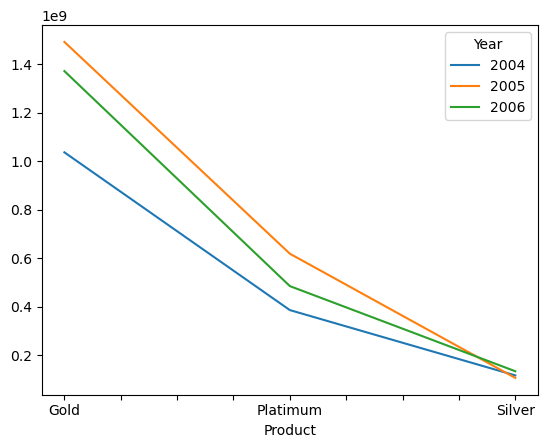

In [44]:
product_wise_yearly_spend.plot(kind='line')

#  Create graphs for
 a. Monthly comparison of total spends, city wise


In [45]:
monthly_spend=spend_data.pivot_table(values='Amount_Limit',index='spend_month',columns='City',aggfunc='sum')

In [46]:
monthly_spend

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
spend_month,,,,,,,,
1,2.308396e+08,1.657191e+08,2.528739e+08,1.133370e+08,2.998696e+08,67457551.42,1.020357e+08,1.069499e+08
2,1.808167e+08,1.142322e+08,2.234892e+08,1.050935e+08,1.383145e+08,29280122.85,5.310983e+07,8.137284e+07
3,1.478226e+08,1.238290e+08,1.163380e+08,8.379331e+07,1.340073e+08,54420772.42,3.450787e+07,6.626960e+07
4,1.088377e+08,5.067203e+07,9.974951e+07,6.624061e+07,9.495228e+07,20344423.75,5.646233e+07,3.230813e+07
5,1.842610e+08,1.093972e+08,1.401690e+08,7.506119e+07,1.715836e+08,44450522.95,4.887660e+07,7.987620e+07
6,3.809868e+07,3.398996e+07,7.076422e+07,3.857151e+07,6.737352e+07,14799531.29,1.603135e+07,1.241044e+07
7,6.281192e+07,5.609516e+06,6.432609e+07,1.814389e+07,3.678149e+07,900027.00,1.550000e+06,8.075020e+06
8,1.669584e+07,2.759673e+07,4.325007e+07,9.482155e+06,6.331633e+07,3745844.82,1.118398e+07,1.346699e+07
9,2.069357e+07,3.646640e+07,4.449363e+07,2.137440e+07,3.492479e+07,1350027.00,1.265939e+06,5.767975e+06


<AxesSubplot:xlabel='spend_month'>

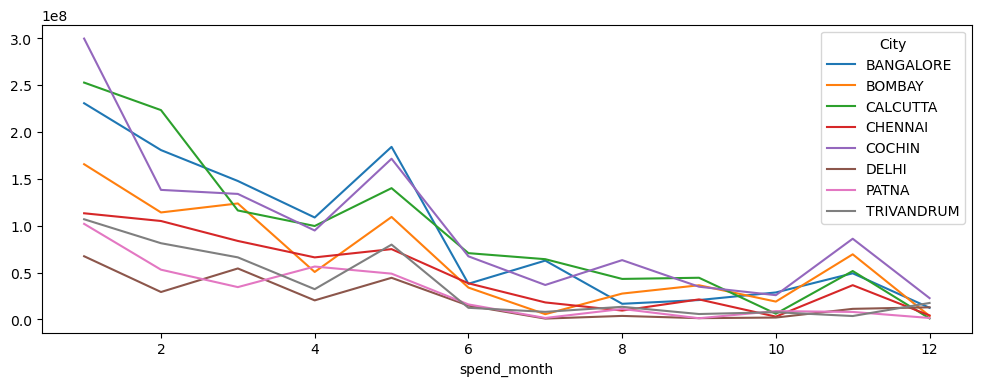

In [67]:
monthly_spend.plot(kind='line',figsize=(12,4))

# . Comparison of yearly spend on air tickets

In [48]:
yearly_spend_airtickets=spend_data.pivot_table(values='Amount_Limit',index='Type',columns='Year')

In [49]:
yearly_spend_airtickets=yearly_spend_airtickets.head(1)

In [50]:
yearly_spend_airtickets

Year,2004,2005,2006
Type,,,
AIR TICKET,135925.558601,209463.66722,104672.130045


<AxesSubplot:xlabel='Type'>

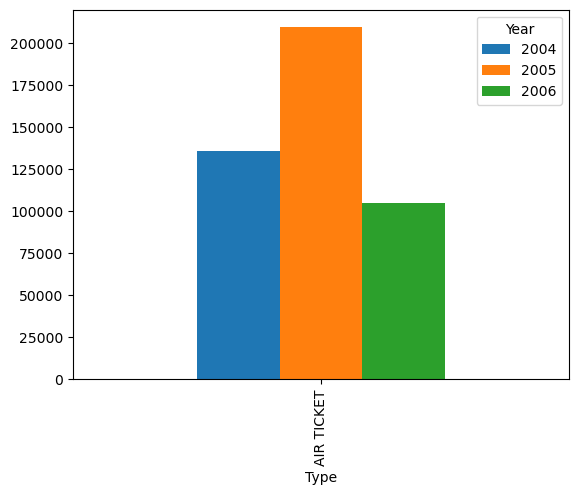

In [51]:
yearly_spend_airtickets.plot(kind='bar')


#  Comparison of monthly spend for each product

In [52]:
product_wise_monthly_spend=spend_data.pivot_table(values='Amount_Limit',index='spend_month',columns='Product',aggfunc='sum')


In [53]:
product_wise_monthly_spend

Product,Gold,Platimum,Silver
spend_month,,,
1,8.507658e+08,3.919087e+08,96408029.18
2,6.330246e+08,2.516036e+08,41080764.24
3,5.096947e+08,1.942044e+08,57089253.13
4,3.513289e+08,1.332545e+08,44983650.40
5,5.961399e+08,2.119807e+08,45554826.55
6,1.910250e+08,8.224614e+07,18768070.55
7,1.492207e+08,3.586312e+07,13114119.94
8,1.351418e+08,4.622154e+07,7374587.70
9,1.124056e+08,4.432547e+07,9605663.01


<AxesSubplot:xlabel='spend_month'>

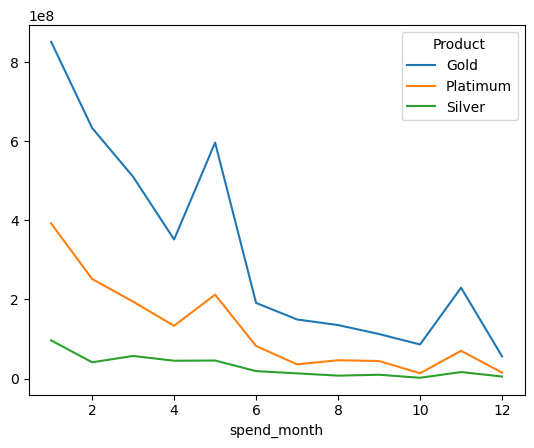

In [54]:
product_wise_monthly_spend.plot(kind='line')
#we can see that during 5 th  & 11thmonth (i.e may& november) there is drastic change in spend in both gold and platinum

#  Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers

In [55]:
def myfunc(product_type,time_period):
    if time_period == 'monthly':
        
        product_wise_monthly_spend=spend_data.pivot_table(values='repayment_Amt',index=['spend_month','Customer'],columns='Product',aggfunc='sum')
        product_wise_monthly_spend=product_wise_monthly_spend.pivot_table(index=['Customer'],values=product_type).sort_values(by=[product_type],ascending=False).head(10)        
        return product_wise_monthly_spend
    
    if time_period == 'yearly':
        product_wise_year_spend=spend_data.pivot_table(values='repayment_Amt',index=['Year','Customer'],columns='Product',aggfunc='sum')
        product_wise_year_spend=product_wise_year_spend.pivot_table(index=['Customer'],values=product_type).sort_values(by=[product_type],ascending=False).head(10)        
        return product_wise_year_spend
        
        

        
        
        
    

In [56]:
myfunc('Gold','monthly')

Product,Gold
Customer,
A60,3.752990e+07
A61,3.337395e+07
A43,3.289825e+07
A13,2.967320e+07
A45,2.909982e+07
A27,2.704976e+07
A44,2.667629e+07
A26,2.448457e+07
A28,2.419447e+07


In [57]:
myfunc('Gold','yearly')

Product,Gold
Customer,
A61,1.334958e+08
A60,1.250997e+08
A13,9.891067e+07
A43,8.772867e+07
A45,8.729946e+07
A12,8.612585e+07
A14,8.208044e+07
A44,8.002888e+07
A42,7.869310e+07
